Azkia Mudrikah

This analysis was conducted to identify factors that can enhance student achievement, specifically by examining students' exam results with a focus on factors originating from within the students themselves.

# Problem Statement

SMART framework:

1. **Specific**: Optimizing factors that influence the improvement of students' exam results.  
2. **Measurable**: Increasing the scores of students who have not yet reached the minimum passing grade (75 out of 100).  
3. **Achievable**: Focusing on internal factors such as increasing study hours, attending additional tutoring sessions, and optimizing school attendance.  
4. **Relevant**: Emphasizing student self-improvement ensures optimal results, as students will be able to perform well regardless of their external environment, leading to improved exam outcomes.  
5. **Time-Bound**: Results can be observed within 3 months (during the Mid-Semester Exam).  

# Breaking down the problem

## Main problem: Improving Students' Exam Scores.

1. What type of students should we pay more attention to regarding their exam results?  
2. Does the frequency of student study sessions affect their exam scores?  
3. How much independent study time is needed for students to reach the minimum passing grade?  
4. Can adding tutoring sessions and optimizing class attendance impact students' exam scores?  
5. How does student motivation influence their exam performance?  
6. Does the social circle of students affect their academic achievement?  
7. Does parental involvement in students' education impact their academic performance?  
8. Does teacher competence influence students' academic success?  

sumber dataset: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?select=StudentPerformanceFactors.csv

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import kstest
from scipy.stats import spearmanr
from scipy import stats


In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df

,Hours_Studied(per week),Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions (per month),Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity (hours per week),Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Data cleaning

First, reviewing the dataset's information is essential. Identifying the column names along with their data types helps streamline the analysis process.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Hours_Studied(per week)             6607 non-null   int64 
 1   Attendance                          6607 non-null   int64 
 2   Parental_Involvement                6607 non-null   object
 3   Access_to_Resources                 6607 non-null   object
 4   Extracurricular_Activities          6607 non-null   object
 5   Sleep_Hours                         6607 non-null   int64 
 6   Previous_Scores                     6607 non-null   int64 
 7   Motivation_Level                    6607 non-null   object
 8   Internet_Access                     6607 non-null   object
 9   Tutoring_Sessions (per month)       6607 non-null   int64 
 10  Family_Income                       6607 non-null   object
 11  Teacher_Quality                     6529 non-null   obje

The code below is used to check whether the column names are consistent or not.

In [4]:
df.columns

Index(['Hours_Studied(per week)', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions (per month)', 'Family_Income', 'Teacher_Quality',
       'School_Type', 'Peer_Influence', 'Physical_Activity (hours per week)',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender', 'Exam_Score'],
      dtype='object')

From the summary above, it is evident that all column names are consistent, requiring only minor adjustments. The dataset consists of 7 numeric columns, 13 object-type columns, 6607 rows, and 3 columns containing missing values. Before proceeding with the analysis, data cleaning is carried out first. As an initial step, column names are modified by replacing white spaces with underscores to simplify the analysis process.

In [5]:
df.rename(columns={'Hours_Studied(per week)':'hours_studied(per_week)', 'Tutoring_Sessions (per month)':'Tutoring_Sessions(per_month)','Physical_Activity (hours per week)':'Physical_Activity(hours_per_week)'}, inplace=True)
df.head(5)

,hours_studied(per_week),Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions(per_month),Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity(hours_per_week),Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


After modifying all column names, the next step is handling missing values by removing rows containing missing data and deleting duplicate rows. Once all missing values and duplicates have been addressed, review the overall dataset information again to ensure it is clean.

In [6]:
#deleting missing value
df.dropna(inplace=True)
#deleting duplicated rows
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   hours_studied(per_week)            6378 non-null   int64 
 1   Attendance                         6378 non-null   int64 
 2   Parental_Involvement               6378 non-null   object
 3   Access_to_Resources                6378 non-null   object
 4   Extracurricular_Activities         6378 non-null   object
 5   Sleep_Hours                        6378 non-null   int64 
 6   Previous_Scores                    6378 non-null   int64 
 7   Motivation_Level                   6378 non-null   object
 8   Internet_Access                    6378 non-null   object
 9   Tutoring_Sessions(per_month)       6378 non-null   int64 
 10  Family_Income                      6378 non-null   object
 11  Teacher_Quality                    6378 non-null   object
 12  School_Type

The data cleaning process resulted in 6378 rows with no columns containing missing values. This analysis focuses on factors originating from within the students themselves. Based on the available columns, the relevant factors related to the students’ internal attributes are:  

1. Study duration in a week (in hours)  
2. Percentage of class attendance  
3. Student motivation  
4. Attendance in additional learning sessions  

However, there are external factors that also need to be considered, including:  

1. Parental involvement in the child's education  
2. Teacher quality  
3. Peer influence on academic performance  

These additional factors are significant because they have substantial impacts on students. Parents play a role as educators at home, teachers as guides at school, and peers often influence students' behavior and attitudes.  

After identifying the relevant columns, we can remove other columns that are not needed for this analysis.

In [7]:
df = df.drop(columns=['Learning_Disabilities','Previous_Scores','Sleep_Hours','Access_to_Resources', 'Extracurricular_Activities', 'Internet_Access','Family_Income','School_Type', 'Physical_Activity(hours_per_week)','Parental_Education_Level','Distance_from_Home', 'Gender'])

After gathering the necessary data, the next step is to begin the analysis. This can involve several key activities, such as:

1. **Descriptive Analysis**: To understand the distribution and central tendencies of the data, using summary statistics (mean, median, mode, etc.) and visualizations (histograms, box plots, etc.).

2. **Correlation Analysis**: Identifying relationships between internal factors (e.g., study time, attendance, motivation) and exam performance.

3. **Exploratory Data Analysis (EDA)**: Investigating patterns, outliers, and trends in the data to guide further modeling or hypothesis testing.

4. **Hypothesis Testing**: Testing if certain factors significantly influence students' academic performance.

# Exploratory Data Analysis

### What type of students should we pay more attention to regarding their exam results?

This analysis focuses on students whose exam scores have not exceeded the minimum passing grade (less than or equal to 75), so students with scores below 76 are the main focus of this study. Create a new dataframe with exam scores <76.

In [8]:
under_KKM = df.loc[df['Exam_Score'] < 76]
under_KKM

,hours_studied(per_week),Attendance,Parental_Involvement,Motivation_Level,Tutoring_Sessions(per_month),Teacher_Quality,Peer_Influence,Exam_Score
0,23,84,Low,Low,0,Medium,Positive,67
1,19,64,Low,Low,2,Medium,Negative,61
2,24,98,Medium,Medium,2,Medium,Neutral,74
3,29,89,Low,Medium,1,Medium,Negative,71
4,19,92,Medium,Medium,3,High,Neutral,70
...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,1,Medium,Positive,68
6603,23,76,High,Medium,3,High,Positive,69
6604,20,90,Medium,Low,3,Medium,Negative,68
6605,10,86,High,High,2,Medium,Positive,68


Once the dataframe contains only students with scores below the minimum passing grade (KKM), we can calculate the mean, median, and mode to assess the gap between the KKM and the average scores below the KKM.

In [9]:
mean = under_KKM['Exam_Score'].mean()
median = under_KKM['Exam_Score'].median()
modus = under_KKM['Exam_Score'].mode().values[0]

print(f'Mean {mean:.0f}')
print(f'Median {median}')
print(f'Mode {modus}')
print(f"Percentage of students' scores below the minimum passing grade (KKM). {round((((len(under_KKM)/len(df)))*100), 2)}%")

Mean 67
Median 67.0
Mode 68
Percentage of students' scores below the minimum passing grade (KKM). 98.81%


The code below is used to ensure that the mode value obtained from the previous calculation is the only mode in the dataset.

In [10]:
under_KKM['Exam_Score'].value_counts()

Exam_Score
68    738
66    722
67    692
65    650
69    599
70    526
64    478
71    398
63    350
72    298
62    261
61    166
73    133
74    102
60     75
75     48
59     39
58     21
57      4
55      1
56      1
Name: count, dtype: int64

Here is a comparison of the number of students who have reached the minimum passing grade (KKM) and those whose scores are still below the KKM.

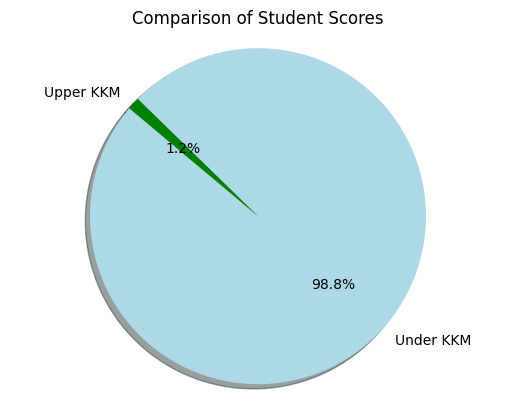

In [27]:
labels = ["Under KKM", "Upper KKM"]
sizes = [98.81, 1.19]
colors = ['lightblue','green']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Comparison of Student Scores')
plt.show()

The comparison above provides a clear picture of how few students have managed to achieve scores above the minimum passing grade (KKM). However, this situation is not too concerning when considering the average score (mean) and median, which are 67 and 68, respectively. The average and median scores are only 8 points below 75, a relatively small gap. Moreover, the mode is 68, which has an even smaller gap with the KKM compared to the average and median scores.

Based on the calculations of the mean, median, and mode, it can be concluded that students with scores below the KKM are not necessarily low-performing students. Rather, they just need a little more attention to surpass the KKM.

### Does the frequency of student study sessions affect their exam scores?

Before conducting statistical analysis to address this issue, a normality test is performed first. Based on the mean, median, and mode values from the previous calculations, the data appears to follow a normal distribution. However, this assumption must be confirmed through a normality test, given that the large dataset size may lead to a wide distribution, potentially causing the data to be non-normal.

The normality test is performed using the Kolmogorov-Smirnov Test (K-S Test). This method is used because, according to several sources, the Kolmogorov-Smirnov Test (K-S Test) tends to be more sensitive to large datasets and provides more accurate results.

The hypotheses for the normality test are as follows:

H0 = p-value > 0.05, indicating that the data follows a normal distribution

H1 = p-value < 0.05, indicating that the data does not follow a normal distribution

In [28]:
stat_jb, p_jb = kstest(under_KKM['hours_studied(per_week)'], 'norm')
stat_nu, p_nu = kstest(under_KKM['Exam_Score'], 'norm')

print(f'P-value Duration of Studying (K-S Test): {p_jb}')
print(f'P-value Exam Score (K-S Test): {p_nu}')


P-value Duration of Studying (K-S Test): 0.0
P-value Exam Score (K-S Test): 0.0


The results of the normality test show a p-value < 0.05, indicating that the data does not follow a normal distribution. Therefore, the analysis of the impact of study hours on exam scores will proceed using the Spearman rank correlation method.

In [13]:
corr, p_value = spearmanr(under_KKM['hours_studied(per_week)'], under_KKM['Exam_Score'])
print(f'Spearman correlation: {(corr):.2f}, P-value: {p_value}')

Spearman correlation: 0.48, P-value: 0.0


A correlation value of 0.48 indicates a positive correlation between exam scores and study duration. This means that as study duration increases, exam scores tend to increase as well. Meanwhile, a p-value < 0.05 shows that the relationship between study duration and exam scores is statistically significant.

### How much independent study time per week is needed for students to achieve the minimum passing grade (KKM)?

After determining that the duration of independent study influences students' exam scores, we can estimate the appropriate study time required to improve exam scores using the available data.

It is important to note that we aim to find the optimal range of study time that will enable students to achieve the minimum passing grade (KKM). Therefore, the reference study time will be based on the study hours of students whose exam scores have already exceeded the KKM.

First, partition the column of students whose exam scores exceed the minimum passing grade (KKM) from the entire dataframe.

In [14]:
upper_KKM = df.loc[df['Exam_Score'] > 75]

Next, partition the columns for study duration and exam scores into a new dataframe.

In [15]:
BM2 = upper_KKM[['hours_studied(per_week)','Exam_Score']].groupby('Exam_Score').mean()

After creating the dataframe containing the study hours and exam scores columns, the next step is to calculate the optimal study time required to improve exam scores. This range can be calculated by finding the confidence interval (in this case, a 95% confidence interval) using the following code:

In [16]:
std = BM2['hours_studied(per_week)'].std()     
N = len(BM2)                    
low, up = stats.norm.interval(    
    0.95,                         
    loc=BM2['hours_studied(per_week)'].mean(), 
    scale=std/np.sqrt(N)          
    )
print('Lower Limit:',low)   
print('Upper Limit:',up) 

Lower Limit: 19.47171844692568
Upper Limit: 24.305712108629873


Based on the calculations above, the optimal study time to exceed the minimum passing grade (KKM) is between 19 and 24 hours per week.

### Can adding tutoring sessions and optimizing class attendance impact students' exam scores?

Similar to the previous analysis, the data in the columns *Tutoring_Sessions(per_month)* and *attendance* must also undergo a normality test. The hypotheses for the normality test are as follows:

H0 = p-value > 0.05, indicating that the data follows a normal distribution

H1 = p-value < 0.05, indicating that the data does not follow a normal distribution

In [17]:
stat_att, p_att = kstest(under_KKM['Attendance'], 'norm')
stat_ts, p_ts = kstest(under_KKM['Tutoring_Sessions(per_month)'], 'norm')

print(f'P-value attendance (K-S Test): {p_ts}')
print(f'P-value sesi tutoring (K-S Test): {p_ts}')

P-value attendance (K-S Test): 0.0
P-value sesi tutoring (K-S Test): 0.0


A p-value < 0.05 indicates that both datasets do not follow a normal distribution. Since the data is non-normal, we will use the Spearman rank correlation to test the relationship.

In [29]:
corr, p_value = spearmanr(under_KKM['Attendance'], under_KKM['Exam_Score'])
corr2, p_value2 = spearmanr(under_KKM['Tutoring_Sessions(per_month)'], under_KKM['Exam_Score'])
print(f'Spearman correlation class attendance: {(corr):.2f}, P-value: {p_value:.2f}')
print(f'Spearman correlation tutoring session: {(corr2):.2f}, P-value: {p_value2:.2f}')

Spearman correlation class attendance: 0.68, P-value: 0.00
Spearman correlation tutoring session: 0.16, P-value: 0.00


The correlation values between attendance and tutoring sessions with exam scores are 0.68 and 0.16, respectively, indicating a positive correlation between both factors and exam scores. Meanwhile, a p-value < 0.05 shows that the relationship between attendance, tutoring sessions, and exam scores is statistically significant. It can be concluded that optimizing student attendance in class and adding tutoring sessions can improve students' exam scores.

### How does student motivation affect their exam scores?


To determine the relationship between motivation and exam scores, the calculation is performed using the following method:

In [19]:
Motivation = under_KKM.groupby('Motivation_Level')[['Exam_Score']].mean().reset_index()
Motivation

,Motivation_Level,Exam_Score
0,High,67.491242
1,Low,66.572821
2,Medium,67.130666


The results above indicate that student motivation affects exam scores. Although the difference is small, motivation still has an impact on students' exam performance. To provide a clearer picture, the results of the analysis are presented in the following graph:


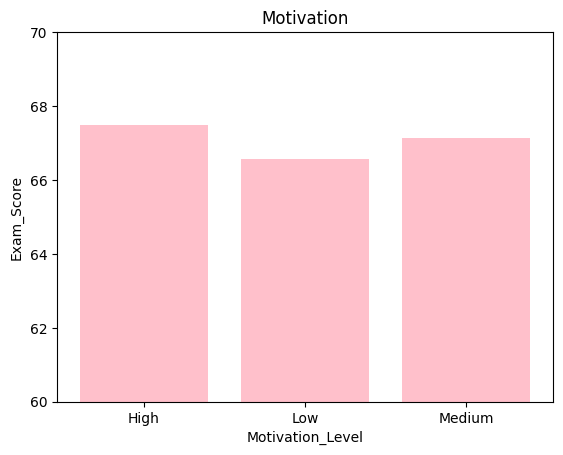

In [30]:
# Membuat grafik line chart
plt.bar(Motivation['Motivation_Level'], Motivation['Exam_Score'], color='pink')

# Menambahkan judul dan label
plt.title('Motivation')
plt.xlabel('Motivation_Level')
plt.ylabel('Exam_Score')
plt.ylim(60,70)

# Menampilkan grafik
plt.show()


Through this graph, the impact of student motivation on exam scores is more clearly depicted. Students with high motivation tend to have higher exam scores compared to students with moderate motivation. Similarly, students with moderate motivation perform better than those with low motivation. Students need to be able to manage their emotions effectively in order to maintain their motivation for studying.

### Does peer group influence students' academic performance?

In [21]:
Peer_Influence = under_KKM.groupby('Peer_Influence')[['Exam_Score']].mean().reset_index()
Peer_Influence

,Peer_Influence,Exam_Score
0,Negative,66.411676
1,Neutral,66.994316
2,Positive,67.411111


Peer groups often influence an individual's behavior, and in this case, students' exam scores can be affected by their peer group. The results above show that positive friendships are associated with the highest exam scores. Below is the graph displaying the results of the above calculation:

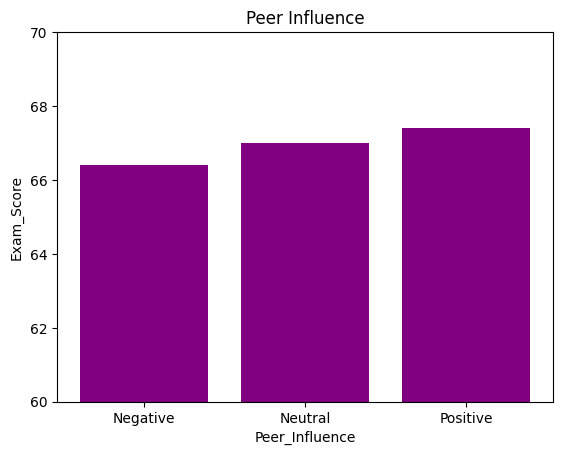

In [31]:
# Membuat grafik line chart
plt.bar(Peer_Influence['Peer_Influence'], Peer_Influence['Exam_Score'], color='purple')

# Menambahkan judul dan label
plt.title('Peer Influence')
plt.xlabel('Peer_Influence')
plt.ylabel('Exam_Score')
plt.ylim(60,70)


# Menampilkan grafik
plt.show()

The graph above shows that the better the student's peer group, the better their exam scores tend to be. Students must be able to choose who they associate with, considering whether their friendships lead to positive outcomes or not. Although peer groups can be considered an external factor, the decision to choose one’s social circle ultimately lies with the student themselves.

### Does parental involvement in students' education affect their academic performance?

In [23]:
Parental = under_KKM.groupby('Parental_Involvement')[['Exam_Score']].mean().reset_index()
Parental

,Parental_Involvement,Exam_Score
0,High,67.814444
1,Low,66.157277
2,Medium,66.955645


The analysis results above show that parental involvement affects students' exam scores. The graph below provides a clearer picture of this relationship.

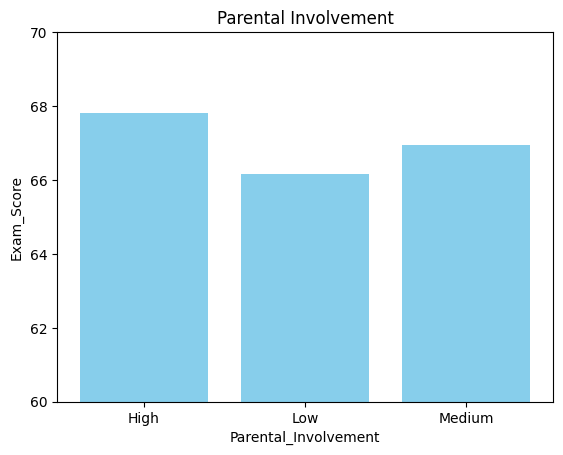

In [32]:
# Membuat bar chart
plt.bar(Parental['Parental_Involvement'], Parental['Exam_Score'], color='skyblue')

# Menambahkan judul dan label
plt.title('Parental Involvement')
plt.xlabel('Parental_Involvement')
plt.ylabel('Exam_Score')
plt.ylim(60, 70) 

# Menampilkan grafik
plt.show()


Although parents are considered an external factor influencing exam scores, their involvement is closely linked to student performance, as school-age children still require parental supervision. The level of parental involvement can significantly affect whether students can maintain emotional stability, motivation to study, and other factors. This serves as an evaluation for parents to pay closer attention to their child's condition.

### Does teacher competence affect student performance?

In [25]:
Teacher = under_KKM.groupby('Teacher_Quality')[['Exam_Score']].mean().reset_index()
Teacher

,Teacher_Quality,Exam_Score
0,High,67.423241
1,Low,66.571875
2,Medium,66.927628


Teacher quality impacts students' exam scores, as seen in the calculation results above. Although teachers are considered an external factor, they are responsible for educating and supervising students during school activities. The influence of teachers on students' exam scores is more clearly illustrated in the following graph:

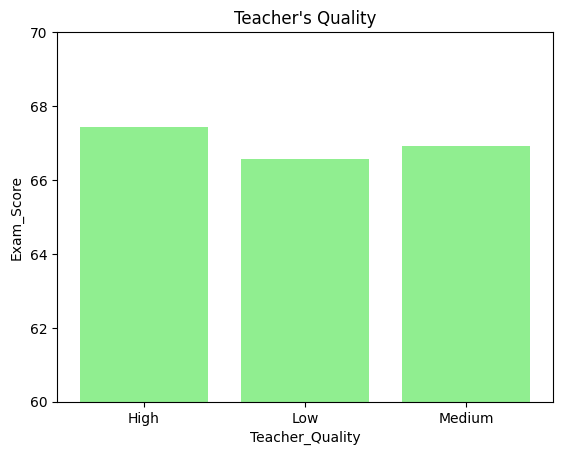

In [33]:
plt.bar(Teacher['Teacher_Quality'], Teacher['Exam_Score'], color='lightgreen')

plt.ylim(60, 70) 
plt.title("Teacher's Quality")
plt.xlabel('Teacher_Quality')
plt.ylabel('Exam_Score')

# Menampilkan grafik
plt.show()

Teachers serve as substitutes for parents when students are at school, so the influence of teachers on students' exam scores can be considered similar to the influence of parents. Teachers must be able to motivate and provide meaningful learning experiences so that students feel comfortable during their studies.

# Conclusion

Based on the analysis, the following actionable suggestions can be made to improve students' exam scores:

1. **Encourage Independent Study:** Students with exam scores below the minimum passing grade (KKM) should adopt the independent study habits of students who exceed the KKM, aiming for 19-24 hours of study per week.

2. **Maximize School Learning:** Improve exam scores by optimizing school-based learning. Ensure students maintain their physical health to achieve maximum attendance (100%).

3. **Utilize Additional Tutoring:** Encourage students to attend additional tutoring sessions as needed to help improve their exam scores. Students should assess when they would benefit from extra tutoring support.

4. **Boost Student Motivation:** Foster motivation in students, as it plays a key role in increasing enthusiasm and engagement in learning.

5. **Guide Peer Group Selection:** Students should be guided in choosing positive peer groups, as these groups can significantly impact their behavior and academic performance.

6. **Involve Parents and Teachers:** Both parents and teachers play a crucial role in improving exam scores. Given that school-age children are highly influenced by the adults around them, it is essential for parents and teachers to collaborate closely to support and guide students effectively.